## This code shows some simple global plotting tools in Phyton

##### The specific example requires a World Ocean Atlas Phosphate concenration netCDF
#####  https://www.ncei.noaa.gov/data/oceans/woa/WOA13/DATAv2/phosphate/netcdf/all/1.00/
##### Greg Silsbe. Jan 22, 2022

In [1]:
# Package dependencies
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Load Global NetCDF data

In [12]:
WOA_phosphate = xr.open_dataset('woa13_all_p00_01.nc', decode_times=False) 
WOA_phosphate

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
  * time                (time) float32 6.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    p_an                (time, depth, lat, lon) float32 ...
    p_mn                (time, depth, lat, lon) float32 ...
    p_dd                (time, depth, lat, lon) float64 ...
    p_sd                (time, depth, lat, lon) float32 ...
    p_se                (time, depth, lat, lon) float32 ...
    p_oa                (time, depth, lat, lon) float32 ...
    p_gp                (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2013 version 2 : moles...
    summary:                         Climatological mean dissolved inorganic ...
    references:                       Garcia H. E., T. P. Boyer, R. A. Locarn...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         global climatology as part of the World ...
    id:                              woa13_all_p00_01.nc
    naming_authority:                gov.noaa.nodc
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    sea_name:                        World-Wide Distribution
    time_coverage_start:             0000-01-01
    time_coverage_duration:          P01Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NODC.Services@noaa.gov
    creator_url:                     http://www.nodc.noaa.gov
    project:                         World Ocean Atlas
    processing_level:                processed
    keywords:                        <ISO_TOPIC_Category> Oceans</ISO_TOPIC_C...
    keywords_vocabulary:             ISO 19115
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Oceanographic Data Center
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/WOA13/pr_wo...
    date_created:                    2011-09-28 
    date_modified:                   2011-09-28

## Plot a single variable (p_an) at a specific depth (.sel(depth=0)

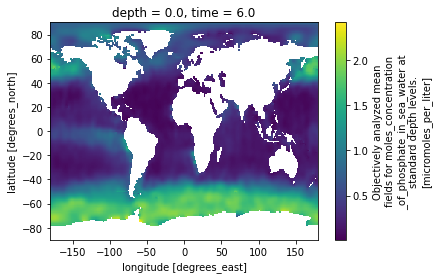

In [3]:
WOA_phosphate.sel(depth=0).p_an.plot()

## Change colorbar
##### https://matplotlib.org/stable/gallery/color/colormap_reference.html https://sciviscolor.org

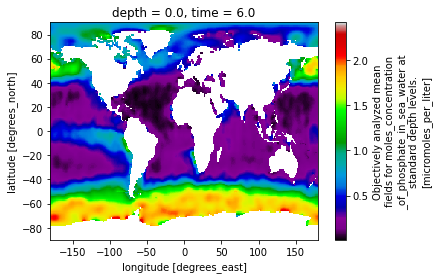

In [4]:
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral')

### Custom Axis Labels
##### Options at https://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.pcolormesh.html

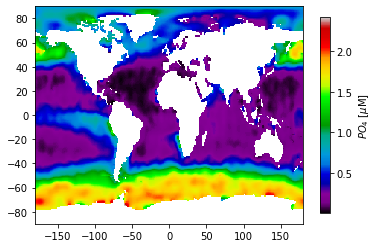

In [5]:
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.9, 'label':r'$PO_4$ [$\mu$M]'})  #'Microstrain [$\mu \epsilon$]' # '$PO_4~$\lambda$'

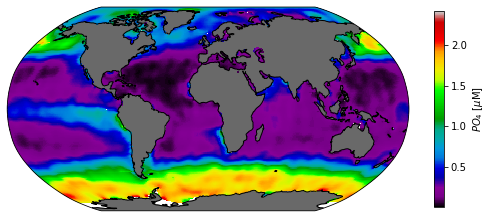

In [6]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())

WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.6, 'label':r'$PO_4$ [$\mu$M]'},
                                     transform=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')
ax.coastlines(resolution='110m')

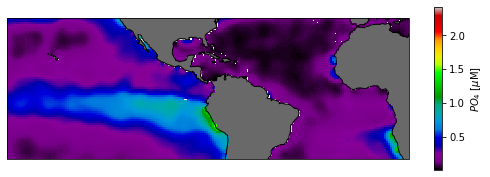

In [7]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 20, -30, 40], crs=ccrs.PlateCarree())
    
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.5, 'label':r'$PO_4$ [$\mu$M]'},
                                     transform=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')
ax.coastlines(resolution='110m')

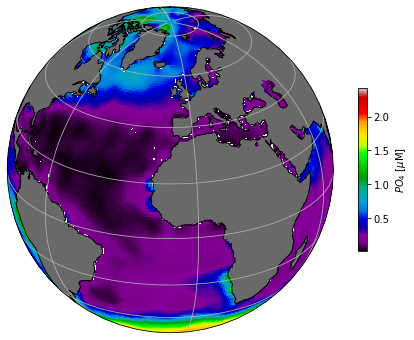

In [8]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Orthographic(-10, 25))
    
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.5, 'label':r'$PO_4$ [$\mu$M]'},
                                     transform=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')
ax.gridlines()
ax.coastlines(resolution='110m')

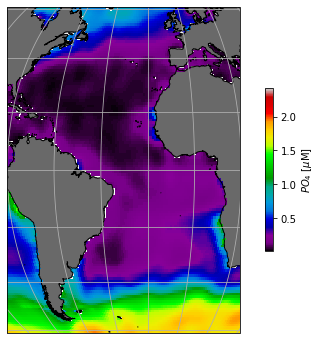

In [9]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-20))
    
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.5, 'label':r'$PO_4$ [$\mu$M]'},
                                     transform=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')
ax.set_extent([-80, 20, -50, 50])
ax.gridlines()
ax.coastlines(resolution='50m')

### Add some station data

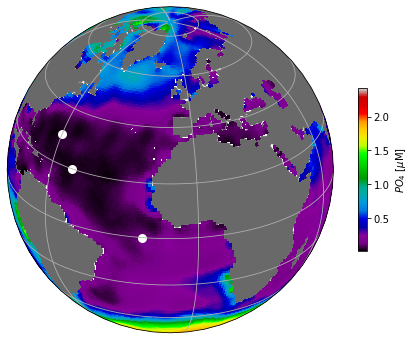

In [10]:
lons = -60, -50, -20 
lats = 30, 20, 0

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Orthographic(-10, 25))
    
WOA_phosphate.sel(depth=0).p_an.plot(cmap='nipy_spectral',
                                     add_labels=False,
                                     cbar_kwargs={'shrink': 0.5, 'label':r'$PO_4$ [$\mu$M]'},
                                     transform=ccrs.PlateCarree()) 

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')
ax.set_global()
ax.gridlines()
ax.scatter(lons, lats, color='white', linewidth=3, marker='o', transform=ccrs.PlateCarree());

